## **isiZulu Text Classification Using Word2Vec PreTrained Model**

# **Data preprocessing**

In [ ]:
!pip install fastText
import fasttext
import numpy as np
import re
import string

from google.colab import drive
drive.mount('/content/drive')


#file_path = '/content/drive/MyDrive/zu/wiki.zu/wiki.zu.vec/'


import numpy as np # linear algebra
import re, os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow as tf

import datetime
from datetime import datetime


# Get the file details
directory = []
file = []
title = []
text = []
label = []
datapath = '/content/drive/MyDrive/zu/zu/'

for dirname, _ , filenames in os.walk(datapath):
    #print('Directory: ', dirname)
    #print('Subdir: ', dirname.split('/')[-1])
    # remove the Readme.txt file
    # will not find file in the second iteration so we skip the error
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        label.append(dirname.split('/')[-1])
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)

DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

fulldf = pd.DataFrame(list(zip(directory, file, title, text, label)),
               columns =['directory', 'file', 'title', 'text', 'label'])

df = fulldf.filter(['text','label'], axis=1)
print(df.shape)
df.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199770 sha256=7b83decd042e3f0b57bb35fc19bf242b205104a9ee4446210906c45ed914f467
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fastText
Mounted at /content/drive
(3313, 2)


,text,label
0,Ulwazi ngoHulumeni www.gov.za Izinkonzo Kuban...,NF-OBJ
1,Ulwazi ngoHulumeni www.gov.za Izinkonzo Kuban...,NF-OBJ
2,Izinkonzo Kubantu Izinkonzo ezinhlanganweni I...,NF-OBJ
3,Ulwazi ngoHulumeni www.gov.za Izinkonzo Kuban...,NF-OBJ
4,Ulwazi ngoHulumeni www.gov.za Izinkonzo Kuban...,NF-OBJ


In [ ]:
df.dropna(inplace=True)
df.shape

(3313, 2)

 **Import Libraries**

In [ ]:
!pip install fastText
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, StratifiedKFold

import pandas
from tqdm import tqdm
tqdm.pandas()
from wordcloud import WordCloud
from gensim.models import Word2Vec,doc2vec

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


import fasttext
from gensim.models import Word2Vec
from gensim.models import fasttext , KeyedVectors
from gensim.models.fasttext import load_facebook_vectors
from zipfile import ZipFile

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Embedding ,Dense, Dropout, BatchNormalization
from keras.layers import SimpleRNN, Bidirectional, LSTM, GRU

# **Load The Word2Vec Pre-trained Model**

In [ ]:
model = Word2Vec.load('/content/drive/MyDrive/zu/6_embedding_models/word2vec_sg-monolingual-100-3.model')

**Checking Vector representation of word**

In [ ]:
model.wv['sawubona']

array([ 4.8757717e-01,  2.8016144e-01,  9.8586351e-01, -3.3562213e-02,
        7.2358334e-01,  1.4251532e-01,  1.6768795e-01,  3.4410766e-01,
       -2.5805426e-01, -3.8059315e-01,  1.7712940e-01, -1.0387619e+00,
        2.1531756e-01, -1.1998679e-01,  6.5361959e-01,  7.1949489e-02,
       -6.6648312e-02, -5.9255660e-01,  5.9654117e-01, -6.0843092e-01,
        1.9307700e-01,  3.1427497e-01,  8.6745828e-01, -7.2950351e-01,
        1.0787989e-01,  6.7681849e-01, -2.2943619e-01, -4.5565689e-01,
       -6.3263512e-01,  7.4428529e-01,  9.7010070e-01, -6.0295463e-01,
       -6.1065692e-02, -3.3405551e-01,  3.4466109e-01,  1.6662666e+00,
       -1.1528025e-01,  2.3304261e-01, -6.0495490e-01, -8.0299103e-01,
       -8.0174819e-02, -4.4065037e-01,  2.7746728e-01,  3.3809677e-01,
        7.0911467e-01,  5.4505628e-01, -5.0219905e-01, -4.8979816e-01,
       -7.4875742e-01,  4.5663896e-01,  7.0292073e-01,  1.5534902e-01,
       -4.2738920e-01,  1.6041906e-01, -1.2259467e+00, -2.3399478e-02,
      

In [ ]:
print("Vector Size of each words:",model.vector_size)

Vector Size of each words: 100


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3313 non-null   object
 1   label   3313 non-null   object
dtypes: object(2)
memory usage: 51.9+ KB


**Class Labels**

In [ ]:
df['label'].value_counts()

NF-SUB    1422
NF-OBJ    1416
NF-NEU     475
Name: label, dtype: int64

## **Data Visualization**

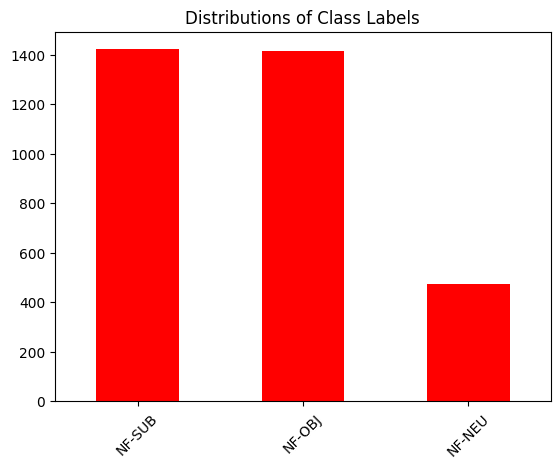

In [ ]:
df['label'].value_counts().plot(kind='bar',color='Red')
plt.title("Distributions of Class Labels")
plt.xticks(rotation=45)
plt.show()

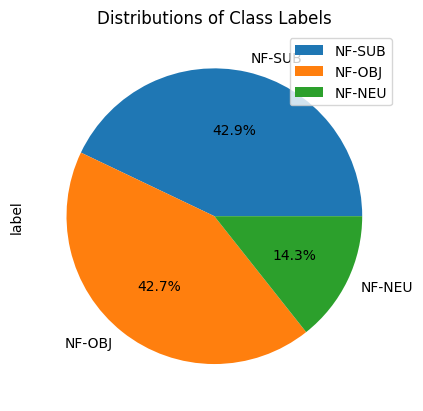

In [ ]:
df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Distributions of Class Labels")
plt.legend()
plt.show()

In [ ]:
## Convert categorical target data into numeric form

df['label'] = df['label'].replace({"NF-OBJ":0,"NF-SUB":1, "NF-NEU":2})

df['label'].value_counts()

1    1422
0    1416
2     475
Name: label, dtype: int64

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,LancasterStemmer
##from contractions import fix
##from unidecode import unidecode

import nltk
nltk.download('stopwords')

stopword_list = stopwords.words("english")

def clean_text(data):
    tokens = word_tokenize(data)
    clean_data = [word.lower() for word in tokens if (word.lower() not in punctuation) and (word.lower() not in stopword_list) and ( len(word)>2) and (word.isalpha()) ]
    return clean_data

#tokens = data.text.apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Split The Data For Train and Test**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'], df['label'].values, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2650,)
(663,)
(2650,)
(663,)


In [ ]:
x_train

1722      Imbubumbubu (Kweekgras) – kukhona indlela yo...
1395     Izinkonzo Kubantu Izinkonzo ezinhlanganweni I...
1192     Ulwazi ngoHulumeni www.gov.za Izinkonzo Kuban...
3142     Zisebenze Uzimele! Iningi lethu linesifiso so...
2349     I-Empowerment Project kaBONA yaphela ngesasas...
                              ...                        
2383     Ukwelashwa nokuzivikela ezifweni zomgudu womc...
2070     B 4803_09 _09 IZITHOMBE NGU-Graeme Borchers; ...
2656     BONA – August 2005 100 BONA – July 2007 Want ...
517      Onga imali, onga ugesi UGESI ukalwa ngama-wat...
32       Ulwazi ngoHulumeni www.gov.za Izinkonzo Kuban...
Name: text, Length: 2650, dtype: object

In [ ]:
y_train

array([2, 0, 0, ..., 1, 0, 0])

In [ ]:
import nltk
nltk.download('punkt')

final_train = x_train.apply(clean_text)
final_test = x_test.apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
len(final_train)

2650

In [ ]:
final_train = final_train.to_list()
final_test = final_test.to_list()

In [ ]:
len(final_test[0])

240

In [ ]:
model.vector_size

100

# Converts Text data into vector representation using Word2vec pre-trained model

In [ ]:
###Converts Text data into vector representation using fasttext pre-trained model

def vectorizer(final_text, model):
    vectorized_text = []

    for document in final_text:
        document_vectors = []  # Store word vectors for this document

        for word in document:
            if word in model.wv:
                word_vector = model.wv[word]
                document_vectors.append(word_vector)

        # Calculate the average vector for the document (if there are word vectors)
        if document_vectors:
            average_vector = np.mean(document_vectors, axis=0)
            vectorized_text.append(average_vector)
        else:
           vectorized_text.append(np.zeros(model.vector_size))

    return vectorized_text

In [ ]:
## final_train and final_test in nested list

vectorized_train = vectorizer(final_train ,model)
vectorized_test = vectorizer(final_test ,model)

In [ ]:
vectorized_x_train = np.array(vectorized_train)
vectorized_x_test = np.array(vectorized_test)

vectorized_x_train

array([[-0.23253635,  0.07121911,  0.46539533, ..., -0.4141508 ,
         0.02317261,  0.08003801],
       [-0.09886325, -0.05591368,  0.33134472, ..., -0.47619933,
         0.0255424 ,  0.10923046],
       [-0.09006205, -0.0469889 ,  0.30230513, ..., -0.36289009,
         0.03445132,  0.05038406],
       ...,
       [ 0.0601001 ,  0.05131171,  0.42166305, ..., -0.34823579,
        -0.18195258, -0.02380024],
       [-0.16117552, -0.05349259,  0.41507456, ..., -0.42995286,
        -0.05173498, -0.02910876],
       [-0.0973588 , -0.06280594,  0.46640024, ..., -0.38135293,
         0.14363237,  0.00431512]])

In [ ]:
# Slice the feature arrays to match the number of samples in the labels
vectorized_x_train = vectorized_x_train[:len(y_train)]
vectorized_x_test = vectorized_x_test[:len(y_test)]

In [ ]:
print(vectorized_x_train.shape)
print(vectorized_x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2650, 100)
(663, 100)
(2650,)
(663,)


**Using** **RandomForest**

In [ ]:
rf=RandomForestClassifier()
rf.fit(vectorized_x_train,y_train)

y_pred=rf.predict(vectorized_x_test)
#y_pred
print("Model evaluation on Test data")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
acc_test=accuracy_score(y_test,y_pred)*100
print('Accuracy for RF Model on Test Data is:',acc_test)
print("********************************************************")

y_pred_train=rf.predict(vectorized_x_train)
#y_pred_train
print("Model evaluation on Train data")
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))
print()
acc_train=accuracy_score(y_train,y_pred_train)*100
print('Accuracy for RF Model on Train Data is:',acc_train)

Model evaluation on Test data
Confusion Matrix:
 [[184  81   6]
 [ 34 261   4]
 [  8   0  85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       271
           1       0.76      0.87      0.81       299
           2       0.89      0.91      0.90        93

    accuracy                           0.80       663
   macro avg       0.82      0.82      0.82       663
weighted avg       0.80      0.80      0.80       663


Accuracy for RF Model on Test Data is: 79.93966817496229
********************************************************
Model evaluation on Train data
Confusion Matrix:
 [[1125   20    0]
 [  12 1111    0]
 [   0    5  377]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1145
           1       0.98      0.99      0.98      1123
           2       1.00      0.99      0.99       382

    accuracy                        

**Using** **KNN**

In [ ]:
knn=KNeighborsClassifier()
knn.fit(vectorized_x_train,y_train)

y_pred=knn.predict(vectorized_x_test)
#y_pred
print("Model evaluation on Test data")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
acc_test=accuracy_score(y_test,y_pred)*100
print('Accuracy for KNN Model on Test Data is:',acc_test)
print("********************************************************")

y_pred_train=knn.predict(vectorized_x_train)
#y_pred_train
print("Model evaluation on Train data")
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))
print()
acc_train=accuracy_score(y_train,y_pred_train)*100
print('Accuracy for KNN Model on Train Data is:',acc_train)

Model evaluation on Test data
Confusion Matrix:
 [[184  81   6]
 [ 62 234   3]
 [ 21   3  69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       271
           1       0.74      0.78      0.76       299
           2       0.88      0.74      0.81        93

    accuracy                           0.73       663
   macro avg       0.77      0.73      0.75       663
weighted avg       0.74      0.73      0.73       663


Accuracy for KNN Model on Test Data is: 73.45399698340876
********************************************************
Model evaluation on Train data
Confusion Matrix:
 [[895 243   7]
 [126 990   7]
 [ 70  23 289]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1145
           1       0.79      0.88      0.83      1123
           2       0.95      0.76      0.84       382

    accuracy                           0.82 

**Using** **SVM**

In [ ]:
svc=SVC()
svc.fit(vectorized_x_train,y_train)

y_pred=svc.predict(vectorized_x_test)
#y_pred
print("Model evaluation on Test data")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
acc_test=accuracy_score(y_test,y_pred)*100
print('Accuracy for SVC Model on Test Data is:',acc_test)
print("********************************************************")

y_pred_train=svc.predict(vectorized_x_train)
#y_pred_train
print("Model evaluation on Train data")
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))
print()
acc_train=accuracy_score(y_train,y_pred_train)*100
print('Accuracy for SVC Model on Train Data is:',acc_train)

Model evaluation on Test data
Confusion Matrix:
 [[156 112   3]
 [ 20 275   4]
 [ 11   5  77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.58      0.68       271
           1       0.70      0.92      0.80       299
           2       0.92      0.83      0.87        93

    accuracy                           0.77       663
   macro avg       0.82      0.77      0.78       663
weighted avg       0.79      0.77      0.76       663


Accuracy for SVC Model on Test Data is: 76.6214177978884
********************************************************
Model evaluation on Train data
Confusion Matrix:
 [[ 621  509   15]
 [  73 1037   13]
 [  41   23  318]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.54      0.66      1145
           1       0.66      0.92      0.77      1123
           2       0.92      0.83      0.87       382

    accuracy                        

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(vectorized_x_train, y_train)

y_pred = logistic_regression.predict(vectorized_x_test)

# Evaluate and print results

#y_pred
print("Model evaluation on Test data")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
acc_test=accuracy_score(y_test,y_pred)*100
print('Accuracy for Logistic Regression on Test Data is:',acc_test)
print("********************************************************")

y_pred_train = logistic_regression.predict(vectorized_x_train)

#y_pred_train
print("Model evaluation on Train data")
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))
print()
acc_train=accuracy_score(y_train,y_pred_train)*100
print('Accuracy for Logistic Regression on Train Data is:',acc_train)



Model evaluation on Test data
Confusion Matrix:
 [[180  88   3]
 [ 47 247   5]
 [ 12   1  80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.66      0.71       271
           1       0.74      0.83      0.78       299
           2       0.91      0.86      0.88        93

    accuracy                           0.76       663
   macro avg       0.80      0.78      0.79       663
weighted avg       0.77      0.76      0.76       663


Accuracy for Logistic Regression on Test Data is: 76.47058823529412
********************************************************
Model evaluation on Train data
Confusion Matrix:
 [[695 423  27]
 [151 958  14]
 [ 48  19 315]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.61      0.68      1145
           1       0.68      0.85      0.76      1123
           2       0.88      0.82      0.85       382

    accuracy                      

## **Fine-tuned models**

Fine-tuned Random Forest Classfiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
rf_grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
rf_grid.fit(vectorized_x_train, y_train)

# Get the best parameters and the best estimator
best_params = rf_grid.best_params_
best_estimator = rf_grid.best_estimator_

# Use the best estimator for predictions
y_pred = best_estimator.predict(vectorized_x_test)



#y_pred
print("Model evaluation on Test data")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
acc_test=accuracy_score(y_test,y_pred)*100
print('Accuracy for Fine-Tuned Random Forest on Test Data is:',acc_test)
print("********************************************************")

y_pred_train = best_estimator.predict(vectorized_x_train)

#y_pred_train
print("Model evaluation on Train data")
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))
print()
acc_train=accuracy_score(y_train,y_pred_train)*100
print('Accuracy for Fine-Tuned Random Forest on Train Data is:',acc_train)




Fitting 5 folds for each of 108 candidates, totalling 540 fits
Model evaluation on Test data
Confusion Matrix:
 [[182  83   6]
 [ 33 260   6]
 [  7   2  84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       271
           1       0.75      0.87      0.81       299
           2       0.88      0.90      0.89        93

    accuracy                           0.79       663
   macro avg       0.82      0.81      0.81       663
weighted avg       0.80      0.79      0.79       663


Accuracy for Fine-Tuned Random Forest on Test Data is: 79.33634992458522
********************************************************
Model evaluation on Train data
Confusion Matrix:
 [[1123   22    0]
 [  14 1105    4]
 [   1    6  375]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1145
           1       0.98      0.98      0.98      1123
           2

## **Fine-Tine KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

# Create the GridSearchCV object
knn_grid = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
knn_grid.fit(vectorized_x_train, y_train)

# Get the best parameters and the best estimator
best_params = knn_grid.best_params_
best_estimator = knn_grid.best_estimator_

# Use the best estimator for predictions
y_pred = best_estimator.predict(vectorized_x_test)


#y_pred
print("Model evaluation on Test data")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
acc_test=accuracy_score(y_test,y_pred)*100
print('Accuracy for Fine-Tuned KNeighborsClassifier on Test Data is:',acc_test)
print("********************************************************")

y_pred_train = best_estimator.predict(vectorized_x_train)
#y_pred_train
print("Model evaluation on Train data")
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))
print()
acc_train=accuracy_score(y_train,y_pred_train)*100
print('Accuracy for Fine-Tuned KNeighborsClassifier on Train Data is:',acc_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Model evaluation on Test data
Confusion Matrix:
 [[191  77   3]
 [ 58 239   2]
 [ 22   2  69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       271
           1       0.75      0.80      0.77       299
           2       0.93      0.74      0.83        93

    accuracy                           0.75       663
   macro avg       0.80      0.75      0.77       663
weighted avg       0.76      0.75      0.75       663


Accuracy for Fine-Tuned KNeighborsClassifier on Test Data is: 75.26395173453997
********************************************************
Model evaluation on Train data
Confusion Matrix:
 [[1145    0    0]
 [  32 1091    0]
 [   0    5  377]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1145
           1       1.00      0.97      0.98      1123
       

## **Fine-tuned Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_grid = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1, verbose=2)

lr_grid.fit(vectorized_x_train, y_train)

best_params_lr = lr_grid.best_params_
best_estimator_lr = lr_grid.best_estimator_

y_pred_lr = best_estimator_lr.predict(vectorized_x_test)


#y_pred
print("Model evaluation on Test data")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
acc_test=accuracy_score(y_test,y_pred)*100
print('Accuracy for Fine-Tuned Logistic Regression on Test Data is:',acc_test)
print("********************************************************")

y_pred_train = best_estimator_lr.predict(vectorized_x_train)
#y_pred_train
print("Model evaluation on Train data")
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))
print()
acc_train=accuracy_score(y_train,y_pred_train)*100
print('Accuracy for Fine-Tuned Logistic Regression on Train Data is:',acc_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Model evaluation on Test data
Confusion Matrix:
 [[191  77   3]
 [ 58 239   2]
 [ 22   2  69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       271
           1       0.75      0.80      0.77       299
           2       0.93      0.74      0.83        93

    accuracy                           0.75       663
   macro avg       0.80      0.75      0.77       663
weighted avg       0.76      0.75      0.75       663


Accuracy for Fine-Tuned Logistic Regression on Test Data is: 75.26395173453997
********************************************************
Model evaluation on Train data
Confusion Matrix:
 [[739 390  16]
 [149 959  15]
 [ 19  15 348]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.65      0.72      1145
           1       0.70      0.85      0.77      1123
           2     